In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv("Fruits.csv")   # reading the data

In [21]:
df.head()    # first 5 rows

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [22]:
df.drop(["fruit_label"],axis=1,inplace=True)    # dropped
df.drop(["fruit_subtype"],axis=1,inplace=True)    # dropped
df.tail()   # last 5 rows

,fruit_name,mass,width,height,color_score
54,lemon,116,6.1,8.5,0.71
55,lemon,116,6.3,7.7,0.72
56,lemon,116,5.9,8.1,0.73
57,lemon,152,6.5,8.5,0.72
58,lemon,118,6.1,8.1,0.70


In [23]:
df.info()   # all non-null and numeric [except the labels]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
fruit_name     59 non-null object
mass           59 non-null int64
width          59 non-null float64
height         59 non-null float64
color_score    59 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.4+ KB


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

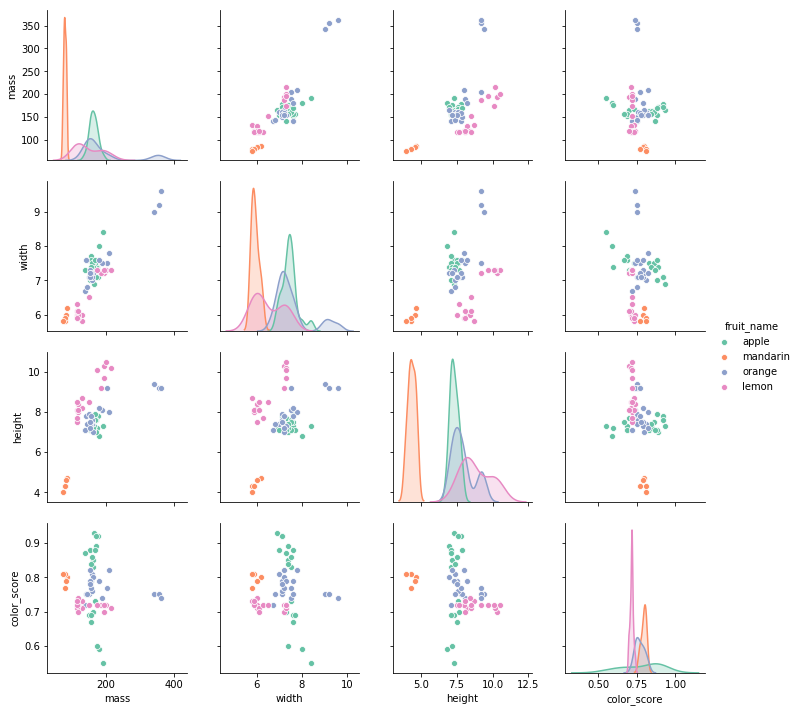

In [25]:
sns.pairplot(data=df,hue="fruit_name",palette="Set2")
plt.show()

In [26]:
features = df.loc[:,["mass","width","height","color_score"]]
X=features

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=99)        # 99 CLUSTERS ?????

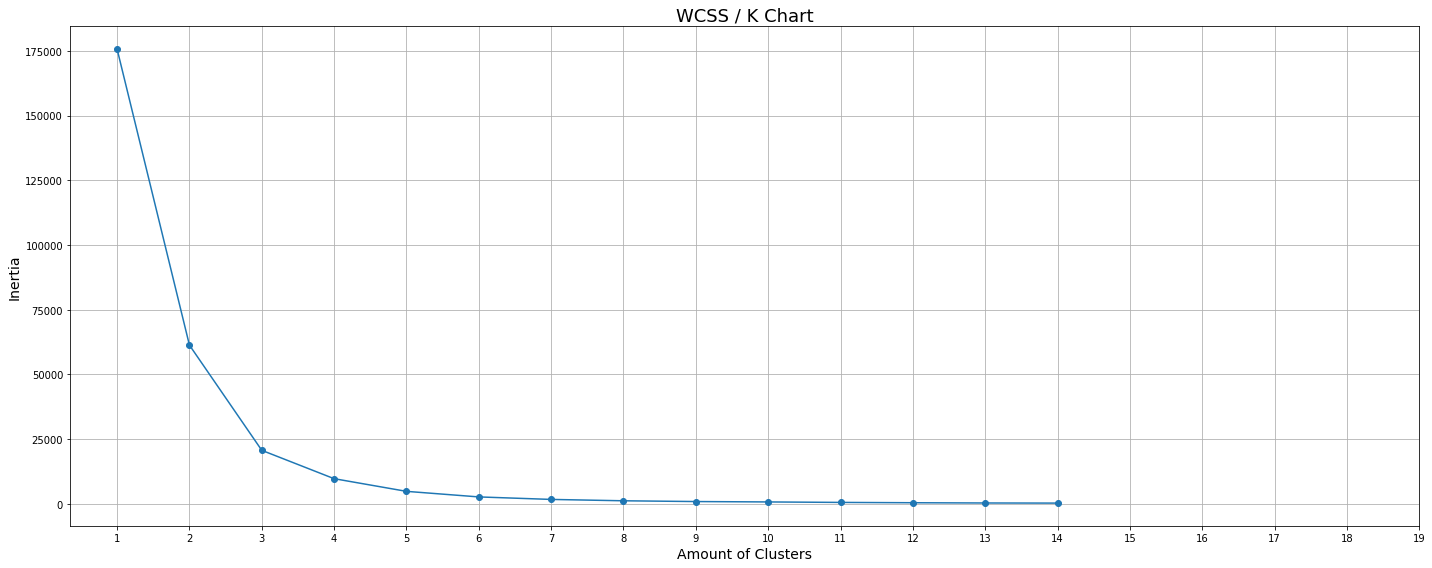

In [28]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

In [46]:
kmeans = KMeans(n_clusters=4) # instantiate a kmeans clustering model

In [47]:
kmeans.fit(X)   # fit the model to the data to being training

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
# predict labels for sample data using trained model
labels = kmeans.predict(X)

In [49]:
# assign width attribute to variable 'xs'
xs = X.iloc[:,1]

In [50]:
# assign petal color attribute to variable 'ys'
ys = X.iloc[:, 2]

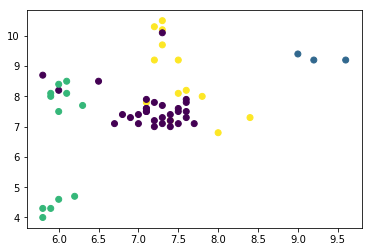

In [51]:
# generate scatter plot
plt.scatter(xs, ys, c = labels)